# Modelling count data using the Poisson distribution

本节需要的包：

In [1]:
require(s20x)


载入需要的程辑包：s20x

Warning message:
"程辑包's20x'是用R版本4.2.3 来建造的"


## The nature of count data

在很多研究中变量将是一个计数。（非负整数）

在统计的说法，一个计数变量是离散变量的一个例子，因为它可以是离散的值分开。(相比之下，一个变量正态分布是一个连续变量，因为如果可以带任何值连续)。

In this course we shall encounter three types of count data:

- Counts of the number of “events” occurring. “事件”发生的次数
  
  where ideally, the events occur independently of one another and with no specific upper limit on the maximum number. 其中，在理想情况下，事件的发生是相互独立的，并且没有对最大数量的具体上限。

- Counts of the number of “successes” from a fixed number of trials. 从固定数量的试验中计算出 "成功 "的数量

  E.g., the number of Heads from tossing a coin 10 times. In this case, the response variable y is the proportion of successes.

- Counts of the number of items in a category. 一个类别中的项目数的计数

  E.g., The count of A, B, and C grades in the course.

## Number of R packages submitted to the Comprehensive R Archive Network (CRAN)

In the following example we will model a count variable (number of R packages submitted to the CRAN over the years) using what we know to date: the linear model via the function `lm()`.

我们将把它与一种更普遍、更合适的计数建模方式进行对比：通过函数的广义线性模型（GLM）`glm()`。

In [2]:
CRAN.df <- read.table("../data/CRAN.txt", header = TRUE)
CRAN.df


Year,Number
<int>,<int>
2005,1
2006,4
2007,2
2008,10
2009,32
2010,44
2011,89
2012,594
2013,830


Let's plotting the data

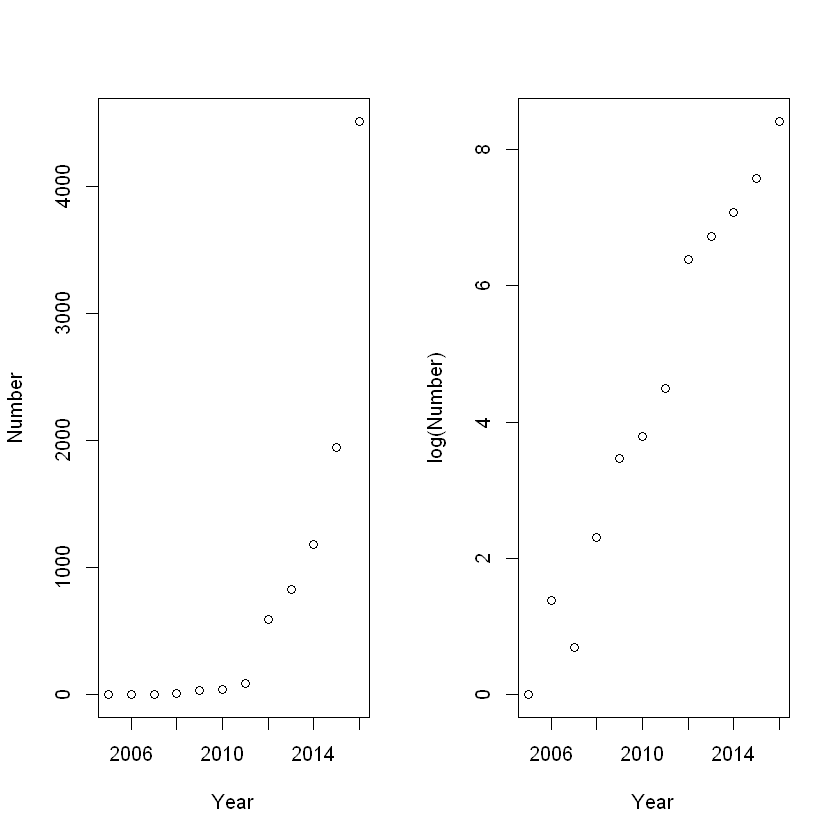

In [3]:
## One-by-two figure layout
par(mfrow = c(1, 2))
## Scatter plot using raw y
plot(Number ~ Year, data = CRAN.df)
## Scatter plot using log y
plot(log(Number) ~ Year, data = CRAN.df)


The relationship between year and number of submissions looks reasonably linear on the log scale, so we’ll fit a linear model to `log(Y)`.

注意：凡是做了 log 处理的数据，都是估计的中位数，而不是平均数。

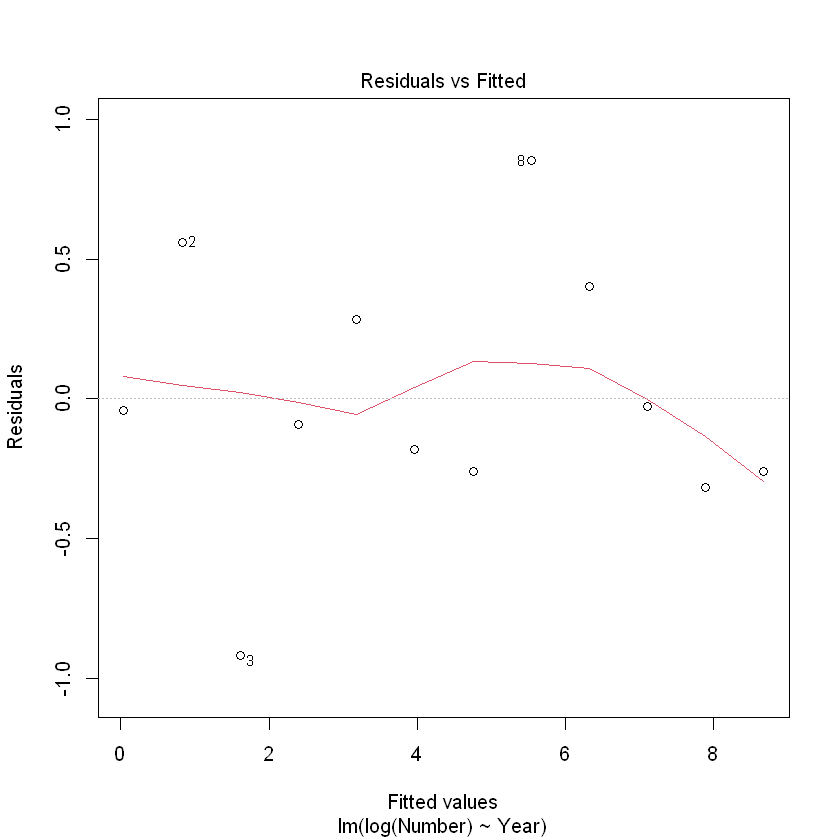

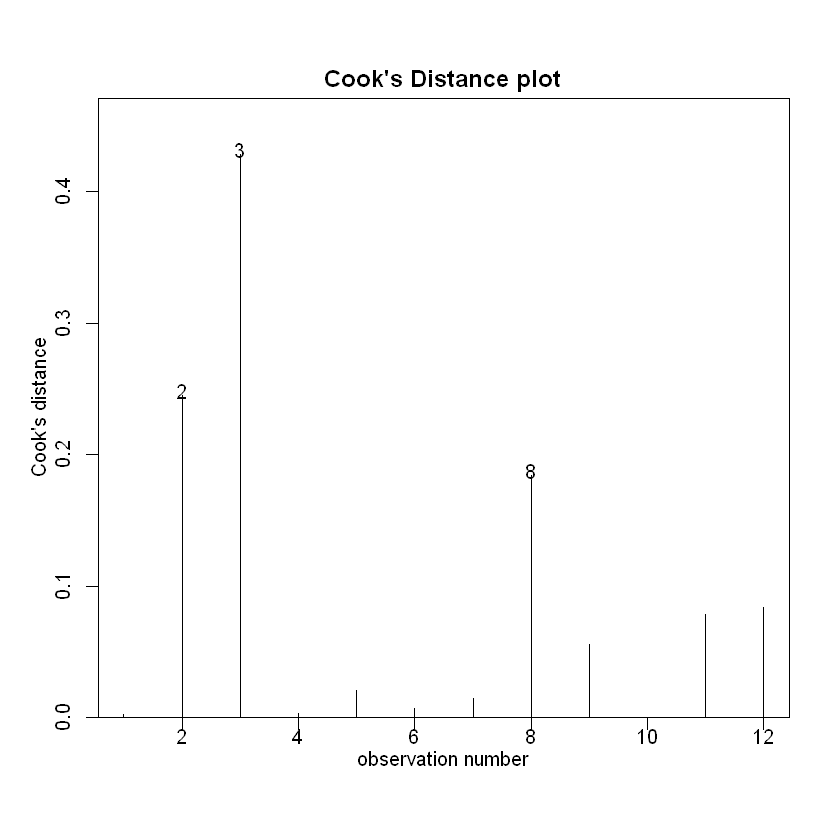

In [4]:
CRAN.fit <- lm(log(Number) ~ Year, data = CRAN.df)
plot(CRAN.fit, which = 1)
# 还有一句被我吞了，我说的
cooks20x(CRAN.fit)


The Cook’s distance for observation 3 exceeds our threshold of 0.4. However, with only 12 observations this is perhaps not of great concern. 观察3的库克距离超过了我们的阈值0.4。然而，由于只有12个观测值，这也许并不值得关注。

In [5]:
summary(CRAN.fit)



Call:
lm(formula = log(Number) ~ Year, data = CRAN.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9174 -0.2607 -0.0668  0.3143  0.8517 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.574e+03  8.245e+01  -19.09 3.39e-09 ***
Year         7.849e-01  4.101e-02   19.14 3.30e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4904 on 10 degrees of freedom
Multiple R-squared:  0.9734,	Adjusted R-squared:  0.9708 
F-statistic: 366.4 on 1 and 10 DF,  p-value: 3.295e-09


Back-transform to get the multiplicative effect of year. 注意这里有写 exp，还原了数据

In [6]:
## Estimated annual multiplier
exp(CRAN.fit$coef["Year"])
## Confidence interval
exp(confint(CRAN.fit))


Year 
2.192237

,2.5 %,97.5 %
(Intercept),0.00000,0.00000
Year,2.00081,2.40198


So, the Executive Summary would have said that the median annual number of submissions to CRAN multiplies by between 2.00 to 2.40 times each year. In other words, it increases by between 100% and 140% per annum. 因此，执行摘要替代，相较于头一年，每年提交给CRAN的中位数是2.00到2.40倍之间。换句话说，它每年增加 100% 到 140% 之间。

In [7]:
predCRAN.df <- data.frame(Year = 2017)
## Prediction on the log scale
pred2017 <- predict(CRAN.fit, predCRAN.df, interval = "confidence")
## Back-transform for the median of the number of submissions in 2017
exp(pred2017)


,fit,lwr,upr
1,12833.05,6550.586,25140.85


So, the Executive Summary would have said that the median of the number of submissions to CRAN in 2017 is between 6550 and 25100.

"如果你只有一把锤子，你往往会把每个问题都看成是钉子。"（亚伯拉罕•马斯洛）

【我们将 "锤子" 改为 "线性模型"，将 "钉子" 改为 "正态分布"】

## The Poisson Distribution

The Poisson is a distribution that takes values on the non-negative { 0,1,2,3,... } integers and it has no upper limit. 泊松是一种在非负{0,1,2,3，…}整数上取值的分布，它没有上限。

The probability that the non-negative integer value y will be observed if generated by a Pois(μ) distribution is given by the following formula 如果由POIS(μ)分布生成，则观察到非负整数值y的概率由以下公式给出:

$$
\text{Pr}(y)=\frac{\exp(-\mu)\mu^y}{y!}
$$

where $y!=\operatorname{factorial(y)} =1\times2\times...\times\bigl(y-1\bigr)\times y\bigl(\text{and}\ 0!=1\bigr)$

For y = 12 and μ = 9.61, this could be calculated in using the code:

In [8]:
y <- 12
mu <- 9.61
(exp(-mu) * mu^y) / factorial(y)


[1] 0.08685078

In R, the in-built function `dpois(y, μ)` calculates these Poisson probabilities. E.g., the probability that y = 12 will be observed from a Pois(9 61) distribution is

In [9]:
dpois(12, 9.61)


[1] 0.08685078

You can also generate random Poisson values. E.g., here are 20 random values from a Pois(10) distribution,

In [10]:
rpois(20, 10)


[1]  8 10  9 16  9 16 10 11  5 15 11 13  7 11 10  6 11  4  8 11

假设任何一个星期五晚上的实际人数可以用平均数为3的泊松分布（Pois(3)）来描述，那么酒精中毒者人数的分布是怎样的？

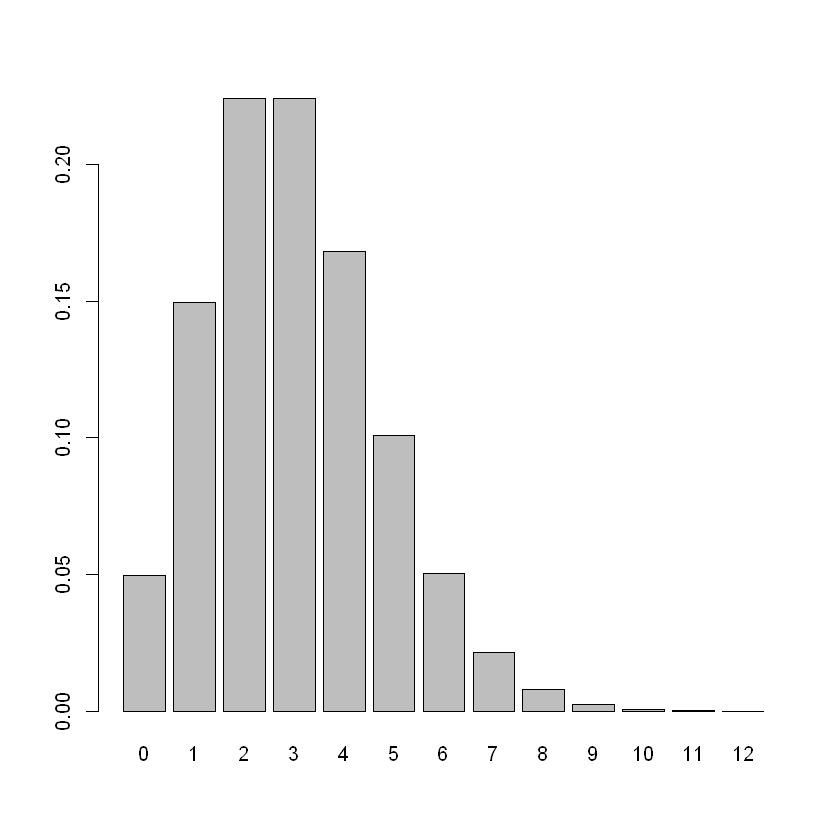

In [11]:
barplot(dpois(0:12, 3), names = 0:12)


由图可以看出泊松分布可能会有长尾、右偏效应。

The probabilities for the number of victims from 0 to 20 are:

In [12]:
round(dpois(0:20, 3), 6)


[1] 0.049787 0.149361 0.224042 0.224042 0.168031 0.100819 0.050409 0.021604
 [9] 0.008102 0.002701 0.000810 0.000221 0.000055 0.000013 0.000003 0.000001
[17] 0.000000 0.000000 0.000000 0.000000 0.000000

但如果均值很大呢？或者说只要足够大，泊松分布就会变成正态分布。

More Poisson distributions:

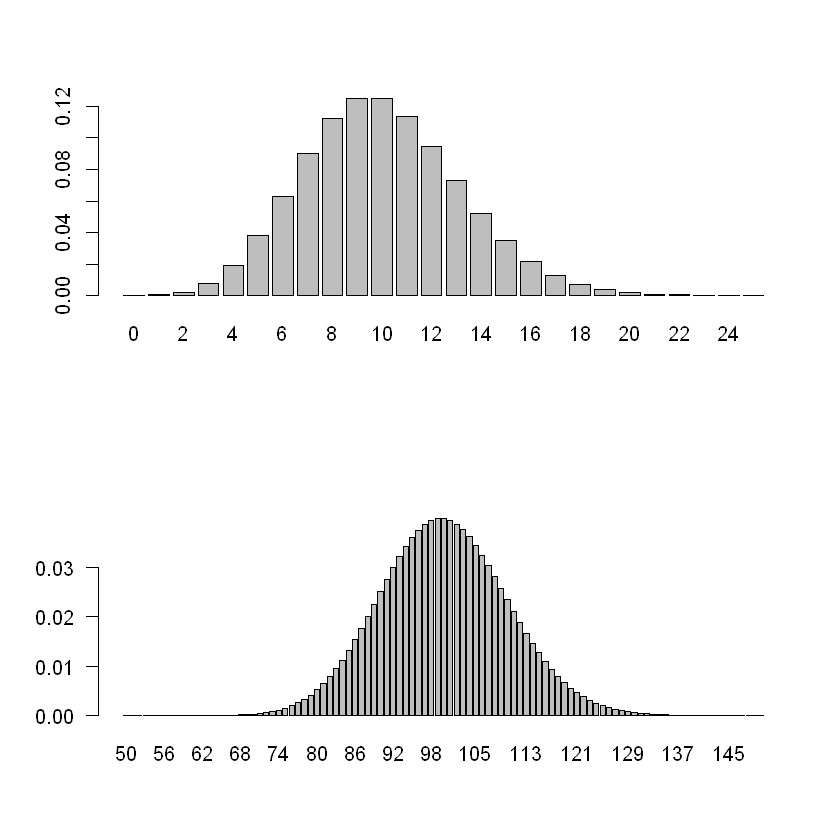

In [13]:
par(mfrow = c(2, 1)) ## Two-by-One figure layout
barplot(dpois(0:25, 10), names = 0:25) ## Pois(10)
barplot(dpois(50:150, 100), names = 50:150, las = 1) ## Pois(100)


Variability increases with the mean μ. In fact, the variance of a
Pois(μ) is also μ. That is, if Y is Pois(μ) distributed then 如果Y是Pois(μ)分布的，则

$$
Var(Y ) = E(Y ) = μ
$$

The Poisson distribution is right-skewed for small values of μ, but looks very much like a (discretised) normal distribution for large μ. 对于μ的小值，泊松分布是右偏的，但对于大μ，泊松分布看起来非常像（离散的）正态分布。

一般来说我们以 30 为界限，30 往后就差不多，30往内称两者有较大差异。

## The generalized linear model (GLM)

广义线性模型。

$$
Y\sim\operatorname{Poisson}(\mu)
$$

where the Poisson parameter ($μ = E[Y]$) changes with respect to an x variable as follows:

$$
\mu=\exp(\beta_0+\beta_1x)
$$

注意：由于变形上是对 x 进行变形而不是 y，所以我们估计的就不是中位值了，而是均值。

The relationship = $\mu=\exp(\beta_0+\beta_1x)$ can equivalently be expressed as 等效的表示为

$$
\log(\mu)=\log E[Y|x]=\beta_0+\beta_1x
$$


In [14]:
CRAN.gfit <- glm(Number ~ Year, family = poisson, data = CRAN.df)
summary(CRAN.gfit)



Call:
glm(formula = Number ~ Year, family = poisson, data = CRAN.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.7487  -4.4233  -2.1953  -0.1449  12.5634  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.282e+03  1.384e+01  -92.64   <2e-16 ***
Year         6.401e-01  6.868e-03   93.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 19374.51  on 11  degrees of freedom
Residual deviance:   402.61  on 10  degrees of freedom
AIC: 481.27

Number of Fisher Scoring iterations: 4


坏了，这下 R 方消失了，只有自由度。别慌，后面继续讲。

First, check the residuals to see if they look random.

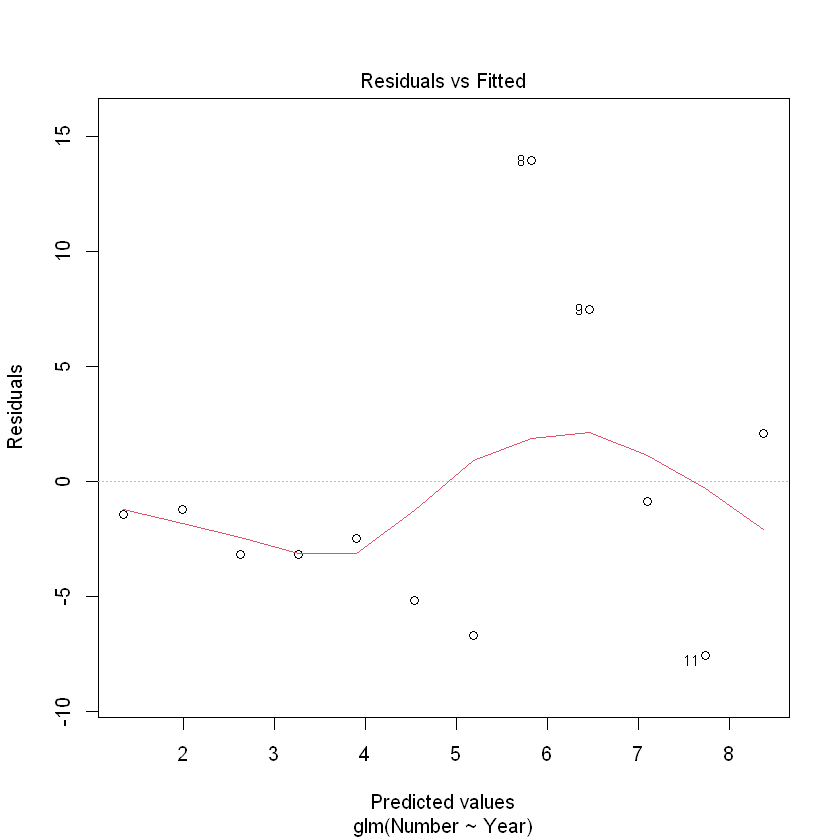

In [15]:
plot(CRAN.gfit, which = 1)


It is not as easy to check the assumptions of a GLM compared to a linear model.

There is another that is essential: Checking the Poisson assumption that the variances of the counts are equal to their means. 检查泊松假设，即计数的方差与它们的平均值相等。

In this example, the residual deviance is 402.61, with 10 df. The P-value is

（下面这个函数叫做卡方检验，代入值为自由度）

In [16]:
1 - pchisq(402.61, 10)


[1] 0

If this P-value is small then we conclude that our model is not adequate. That is clearly the case with the CRAN data. 如果这个P值很小，那么我们的结论是，我们的模型是不充分的。这显然是CRAN数据的情况。

Without quasi-Poisson correction:

In [17]:
CRAN.gfit <- glm(Number ~ Year, family = poisson, data = CRAN.df)
summary(CRAN.gfit)



Call:
glm(formula = Number ~ Year, family = poisson, data = CRAN.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.7487  -4.4233  -2.1953  -0.1449  12.5634  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.282e+03  1.384e+01  -92.64   <2e-16 ***
Year         6.401e-01  6.868e-03   93.20   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 19374.51  on 11  degrees of freedom
Residual deviance:   402.61  on 10  degrees of freedom
AIC: 481.27

Number of Fisher Scoring iterations: 4


对比一下使用 “quasipoisson”（卡方泊松，类泊松）的模型：

In [18]:
CRAN.quasigfit <- glm(Number ~ Year, family = quasipoisson, data = CRAN.df)
summary(CRAN.quasigfit)



Call:
glm(formula = Number ~ Year, family = quasipoisson, data = CRAN.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.7487  -4.4233  -2.1953  -0.1449  12.5634  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.282e+03  8.889e+01  -14.42 5.09e-08 ***
Year         6.401e-01  4.411e-02   14.51 4.81e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 41.25925)

    Null deviance: 19374.51  on 11  degrees of freedom
Residual deviance:   402.61  on 10  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


Let’s check the influence of the observations.

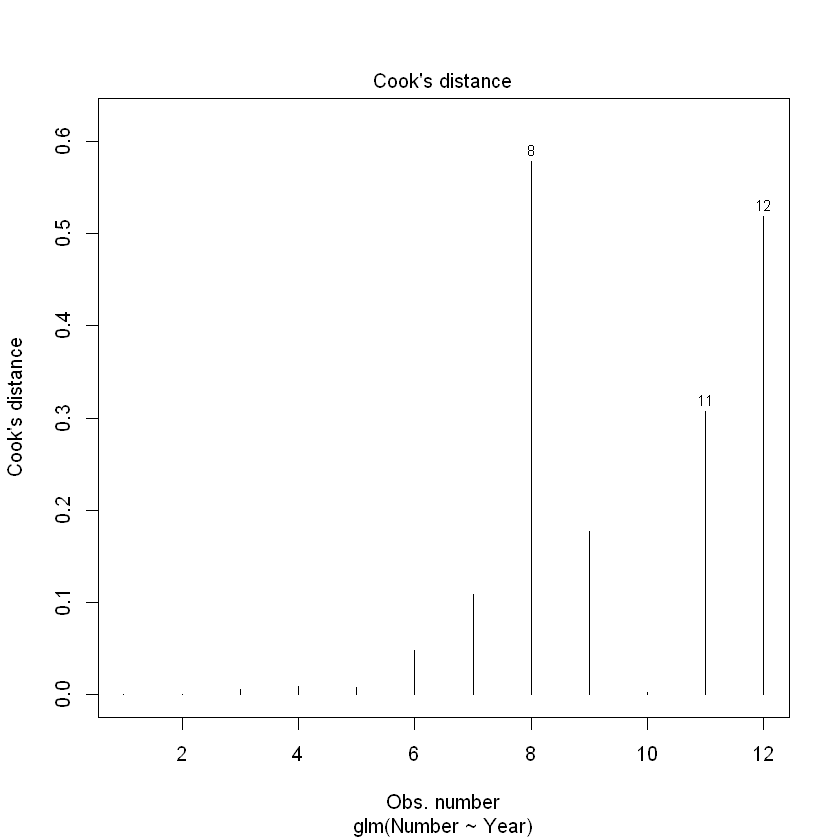

In [19]:
plot(CRAN.quasigfit, which = 4)


我们看到，观察点8和12超过了我们的0.4门槛。然而，必须谨慎地解释这一点。与正常的线性回归不同，在泊松回归中，预计μ值较高的观测值会比μ值较低的观测值有更大的影响。

## Interpretting the GLM output

Recall that our model for the expected number of submissions to the CRAN is

$$
\mu=\exp(\beta_0+\beta_1\times Year)=\exp(\beta_0)\times\exp(\beta_1)^{Year}
$$

so we need to exponentiate our estimate and its confidence interval. 所以我们需要对我们的估计值及其置信区间进行指数化。

In [20]:
## The estimated annual multiplier
exp(CRAN.quasigfit$coef["Year"])

# get confidence intervals for the parameters.
exp(confint(CRAN.quasigfit))
# Sometimes you might see `confint.default()` used instead.
exp(confint.default(CRAN.quasigfit))


Year 
1.896614

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.000000,0.000000
Year,1.745819,2.075781


,2.5 %,97.5 %
(Intercept),0.000000,0.000000
Year,1.739517,2.067898


That is, it increases by between 75% and 108% per year.

> 请注意，GLM模型是对均值而不是对中位值进行陈述的。 这是因为GLM没有对y进行转换。